In [72]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
%matplotlib inline
from scipy import stats

#Hide warning message in notebook
import warnings
warnings.filterwarnings('ignore')

In [73]:
#file to load
mouse_drug_data_to_load = 'data/mouse_drug_data.csv'
clinical_trial_data_to_load = 'data/clinicaltrial_data.csv'

#Import CSV intoa pandas DataFrame
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

#Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_data, clinical_trial_data, on='Mouse ID')

combined_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


# Tumor Response to Treatment

In [74]:
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
#Convert to DataFrame

tumor_mean = combined_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)": ['mean']})
tumor_mean.columns = ["Tumor Volume (mm3)"]
tumor_mean = tumor_mean.reset_index()
tumor_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [75]:
#Store the Standard Erorr of Tumor Volumes Grouped by Drug and Timepoint
#Convert to DF

tumor_sem = combined_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)": ['sem']})
tumor_sem.columns = ["Tumor Volume (mm3)"]
tumor_sem = tumor_sem.reset_index()

tumor_sem

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [76]:
combined_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [77]:
#Minor Data Munging to Re-format the data Frames
#Preview that Reformatting worked

drug_reformat = combined_df.pivot_table("Tumor Volume (mm3)", ['Timepoint'], 'Drug')

drug_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [78]:
tumor_sem_df = tumor_sem.pivot_table("Tumor Volume (mm3)", ['Timepoint'], 'Drug')

tumor_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


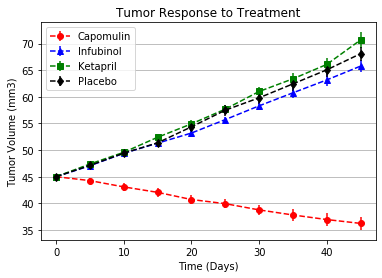

In [79]:
#Plot (with Error Bars)

fig = plt.figure()

plt.errorbar(drug_reformat.index, drug_reformat['Capomulin'], 
             yerr=tumor_sem_df["Capomulin"], 
             color="r", marker="o", 
             linestyle="dashed", label = "Capomulin")
plt.errorbar(drug_reformat.index, drug_reformat["Infubinol"], 
             yerr=tumor_sem_df["Infubinol"], 
             color="b", marker="^", 
             linestyle="dashed", label="Infubinol")
plt.errorbar(drug_reformat.index, drug_reformat["Ketapril"], 
             yerr=tumor_sem_df["Ketapril"], 
             color="g", marker="s", 
             linestyle="dashed", label="Ketapril")
plt.errorbar(drug_reformat.index, drug_reformat["Placebo"], 
             yerr=tumor_sem_df["Placebo"], 
             color="k", marker="d", 
             linestyle="dashed", label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')
plt.legend(loc='best')

#Save the Figure
plt.savefig("analysis/Tumor_Response_to_Treatment.png")

plt.show()


# Metastatic Response to Treatment 

In [89]:
#Store the mean Met. Site Data Grouped by Drug and Timepoint

met_site_mean = combined_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites": ['mean']})
met_site_mean.columns = ["Metastatic Sites"]
met_site_mean = met_site_mean.reset_index()

met_site_mean

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [90]:
#Store the standard Error associated with Met. Sites Grouped by Drug and Timepoint
met_site_sem = combined_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites": ['sem']})
met_site_sem.columns = ["Metastatic Sites"]
met_site_sem = met_site_sem.reset_index()

met_site_sem


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [91]:
#Minor Data Munging to RE-Format the Data Frames

met_site_mean_df = met_site_mean.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')
met_site_sem_df = met_site_sem.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

met_site_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


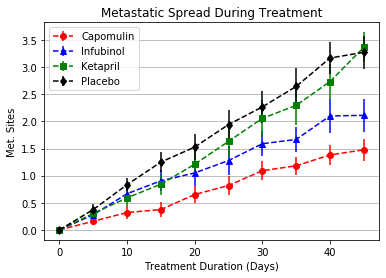

In [98]:
#Generate the Plot (with Error Bars)

plt.errorbar(met_site_mean_df.index, met_site_mean_df['Capomulin'], 
             yerr=met_site_sem_df["Capomulin"], 
             color="r", marker="o", 
             linestyle="dashed", label = "Capomulin")
plt.errorbar(met_site_mean_df.index, met_site_mean_df["Infubinol"], 
             yerr=met_site_sem_df["Infubinol"], 
             color="b", marker="^", 
             linestyle="dashed", label="Infubinol")
plt.errorbar(met_site_mean_df.index, met_site_mean_df["Ketapril"], 
             yerr=met_site_sem_df["Ketapril"], 
             color="g", marker="s", 
             linestyle="dashed", label="Ketapril")
plt.errorbar(met_site_mean_df.index, met_site_mean_df["Placebo"], 
             yerr=met_site_sem_df["Placebo"], 
             color="k", marker="d", 
             linestyle="dashed", label="Placebo")

#Save the Figure

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(axis='y')
plt.legend(loc='best')

plt.savefig("analysis/Metastatic_Spread_During_Treatment.png")

#Show the Figure
plt.show()

# Survival Rate

In [123]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame

survival_rate = combined_df.groupby(['Drug', 'Timepoint']).agg({"Mouse ID": ['count']})
survival_rate.columns = ["Mouse Count"]
survival_rate = survival_rate.reset_index()


# Preview DataFrame
survival_rate.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [124]:
# Minor Data Munging to Re-Format the Data Frames

survival_rate_df = survival_rate.pivot_table('Mouse Count', ['Timepoint'], 'Drug')

# Preview the Data Frame
survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [125]:
100 * survival_rate_df["Capomulin"] / 25

Timepoint
0     100.0
5     100.0
10    100.0
15     96.0
20     92.0
25     88.0
30     88.0
35     88.0
40     84.0
45     84.0
Name: Capomulin, dtype: float64

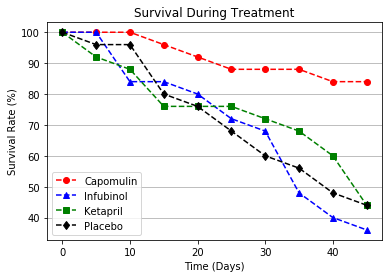

In [130]:


plt.plot(survival_rate_df.index, 
         100 * (survival_rate_df['Capomulin'] / 25), 
         color="r", 
         marker="o", 
         linestyle="dashed", 
         label = "Capomulin")

plt.plot(survival_rate_df.index, 
         100 * (survival_rate_df['Infubinol'] / 25), 
         color="b", 
         marker="^", 
         linestyle="dashed", 
         label = "Infubinol")

plt.plot(survival_rate_df.index, 
         100 * (survival_rate_df['Ketapril'] / 25), 
         color="g", 
         marker="s", 
         linestyle="dashed", 
         label = "Ketapril")

plt.plot(survival_rate_df.index, 
         100 * (survival_rate_df['Placebo'] / 25), 
         color="k", 
         marker="d", 
         linestyle="dashed", 
         label = "Placebo")

#Save the Figure

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(axis='y')
plt.legend(loc='best')

plt.savefig("analysis/Survival_During_Treatment.png")

#Show the Figure
plt.show()

In [253]:
#Calculate the percent changes for each drug

s1 = 100 * (drug_reformat.iloc[-1] - drug_reformat.iloc[0]) / drug_reformat.iloc[0]
s1


#s1.columns = ["Percent Change"]
#s1 = s1.reset_index()
#s2 = pd.DataFrame([s1.iloc[0], s1.iloc[2], s1.iloc[3], s1.iloc[5]])
#s2 = s2.reset_index(drop=True)
s1


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [299]:
#Store Drug List(x value), y values
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
percent_change = [s1.iloc[0], s1.iloc[2], s1.iloc[3], s1.iloc[5]]
percent_change

[-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153]

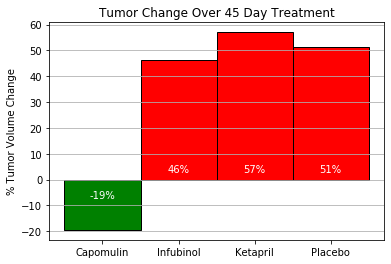

In [309]:
# Orient widths. Add labels, tick marks, colors, etc. 
y_pos = np.arange(len(drugs))
width = 1
colors = []

for x in percent_change:
    if x > 0:
        colors.append('red')
    else:
        colors.append('green')


pct_change = plt.bar(y_pos, percent_change, width, align='center', color=colors, edgecolor= 'black')
plt.grid(axis='y')


#tick_locations = [value for value in x]
plt.xticks(np.arange(len(drugs)), drugs)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

# Annotate bars with percentages

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(pct_change)

# Save the Figure
plt.savefig("analysis/Summary Bar Graph.png")

# Show the Figure
plt.show()

# Insights

* Focusing on Metastatic Spread during the treatment time, Capomulin spread the least than any other drug during the 45 day trial. While Infubinol did not reduce the size of the tumor, it did seem to slow down the Metastatic spreading. 

* This test was tested on 25 mice while measuring their survival rate throughout the duration of the trial. Capomulin maintained the highest percentage of livable mice over the 45 day period, painting >80% survival rate, while the rest of the drugs fell under 50% survival rate.

* In addition, Capomulin is the only drug tested that led to a negative tumor growth volume, while the rest of the drugs allowed the tumor to grow along the similar trend lines of that of the Placebo test. 

* In conclusion, it is clear that Capomulin reduces the size of the tumor, allows it to spread less, and allows the live animal test to maintain the highest level of survival. 